Задание 1.

Написать алгоритм получения данных по вакансиям для IT-специалистов с одного из работных сайтов.

Алгоритм позволяет получить информацию о количестве вакансий по направлениям Data Analyst, Data Science и Data Engineer в разрезе уровней (Junior, Middle, Senior).

За основу можно взять как один регион (НН, Москва и т.д.)  так и несколько.

Результат представить в табличном и/или графическом виде.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                Vacancy  Count
0   junior data analyst    236
1   junior data science    185
2  junior data engineer    477
3   middle data analyst    435
4   middle data science    385
5  middle data engineer    652
6   senior data analyst    595
7   senior data science    557
8  senior data engineer    798


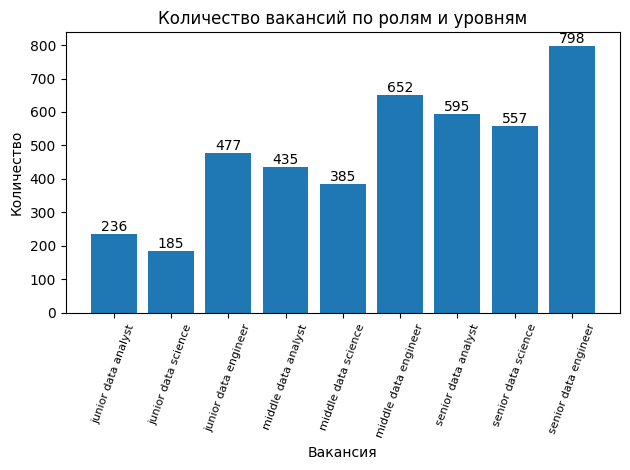

In [ ]:
#2 версия парсера с ООП.
#Первая версия с менее известного сайта,с меньшим числом вакансий.Но была проще для парсинга.(доступна вконце заданий)
#Многие известные сайты используют динамическую подгрузку,что затрудняет процесс.
#парсер вакансий habr по всей России(по всем вакансиям),без региона так нагляднее для анализа. Есть возможнсть сделать под конкретный регион.
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
%pip install google-colab-selenium
import google_colab_selenium as gs
from selenium.webdriver.chrome.options import Options

class VacancyParser:
    def __init__(self):
        self.base_url = "https://career.habr.com/vacancies?q="
        self.options = Options()
        self.options.add_argument("--window-size=1920,1080")  # Set the window size
        self.options.add_argument("--disable-infobars")  # Disable the infobars
        self.options.add_argument("--disable-popup-blocking")  # Disable pop-ups
        self.options.add_argument("--ignore-certificate-errors")  # Ignore certificate errors
        self.options.add_argument("--incognito")  # Use Chrome in incognito mode

    def get_vacancy_list(self,roles, levels):
      """Генерирует список ссылок по указанным ролям и уровням. """
      vacancy_list = []
      for level in levels:
        for role in roles:
          vacancy_list.append(f"{level}+{role.replace(' ', '+')}".lower())
      return vacancy_list


    def generate_vacancy_link(self,vacancy_list):
        """Генерирует список ссылок на вакансий по ролям и уровням. """
        vacancy_link = []
        for vacancy in vacancy_list:
            link =  self.base_url + str(vacancy)
            vacancy_link.append(link)
        return vacancy_link

    def get_vacancy_count(self,url):
      """Получает число вакансий с заданного URL."""
      driver = gs.Chrome(options=self.options)
      driver.get(url)
      # Даем время сайту загрузиться
      driver.implicitly_wait(10)
      # Получаем HTML-код страницы
      html_content = driver.page_source
      # Парсим HTML-код с помощью BeautifulSoup
      soup = BeautifulSoup(html_content, 'html.parser')
      data = soup.find('div',class_="search-total disable-font-boosting search-total--appearance-search-panel").text
      digits = re.findall(r'\d+', str(data))
      result = int(digits[0]) if digits else None
      # Закрываем браузер
      driver.quit()
      return result

    def get_vacancy_data(self,roles, levels):
      """Получает данные о количестве вакансий для каждой роли и уровня."""
      vacancy_list = self.get_vacancy_list(roles, levels)
      vacancy_links = self.generate_vacancy_link(vacancy_list)
      vacancy_data = []
      for link in vacancy_links:
        vacancy_count = self.get_vacancy_count(link)
        if vacancy_count:
          # Находим индекс символа '='
          start_index = link.find("=")+1
          # Делим строку по символу '&'
          parts = link.split("&")
          # Извлекаем подстроку после '='
          substring = parts[0][start_index:]
          vacancy_name = substring.replace("+", " ")
          vacancy_data.append([vacancy_name, vacancy_count])
      return vacancy_data

    def visualize_data(self, vacancy_data):
      """Представление в табличном и графическом виде."""
      df = pd.DataFrame(vacancy_data, columns=['Vacancy', 'Count'])
      print(df)
      bars = plt.bar(df['Vacancy'], df['Count'])
      for bar in bars:
          yval = bar.get_height()
          plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
      plt.xlabel('Вакансия', labelpad=5)
      plt.ylabel('Количество')
      plt.title('Количество вакансий по ролям и уровням')
      plt.xticks(rotation=70, fontsize=8)
      plt.tight_layout()
      plt.show()

# запуск скрипта и параметры:
roles = ['Data Analyst', 'Data Science', 'Data Engineer']
levels = ['Junior', 'Middle', 'Senior']

parser = VacancyParser()
vacancy_data = parser.get_vacancy_data(roles, levels)
parser.visualize_data(vacancy_data)

Задание 2.  Кластеризация и классификация текстовых документов
Описание:
Вам нужно разработать систему, которая обрабатывает текстовые документы, получает их эмбеддинги, выполняет кластеризацию, а затем классифицирует новые документы по ближайшему кластеру.
Этапы задания:
1. Чтение текстовых документов
Прочитайте все .txt файлы из папки и выполните базовую предобработку текста.
Библиотеки: os, glob, nltk или spacy (пример архива в txt-файлами).
2. Преобразование текстов в эмбеддинги
Преобразуйте документы в векторные представления (эмбеддинги) с помощью моделей.
Библиотеки: transformers, sentence-transformers, Gensim.
3. Кластеризация документов
Проведите кластеризацию эмбеддингов и обоснуйте количество кластеров, используя метод локтя или Silhouette Score.
Библиотеки: KMeans, DBSCAN, scikit-learn.
4. Классификация новых документов
Преобразуйте новый документ в эмбеддинг и найдите ближайший кластер с помощью методов ближайших соседей или косинусного расстояния.
Библиотеки: NearestNeighbors, cosine_similarity из scikit-learn.
Результаты:
Чтение и предобработка текстов.
Получение эмбеддингов и кластеризация.
Классификация новых документов по ближайшему кластеру.

In [ ]:
#####1этап
###Загрузите архив в окно
import os
import glob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from google.colab import files
import zipfile
import os
import pickle

def preprocess_text(text):
    """
    Базовая предобработка текста.
    """
    # Токенизация
    tokens = nltk.word_tokenize(text)
    # НЛП с spaCy
    # doc = spacy.load("en_core_web_sm").disable(["parser", "ner"])(text)
    # tokens = [token.text for token in doc]
    # Приведение к нижнему регистру
    tokens = [token.lower() for token in tokens]
    # Удаление пунктуации
    tokens = [token for token in tokens if token.isalnum()]
    # Удаление стоп-слов
    stop_words = nltk.corpus.stopwords.words("english")  # Или другой язык
    tokens = [token for token in tokens if token not in stop_words]
    # Возвращаем список токенов
    return tokens

def read_txt_files(folder_path):
    """
    Чтение всех .txt файлов из папки и выполнение предобработки.
    """
    txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
    token_data = {} # Создаем пустой словарь для хранения токенов
    for filename in txt_files:
        with open(filename, "r", encoding="utf-8") as f:
            text = f.read()
            preprocessed_tokens = preprocess_text(text)
            #print(f"Файл: {filename}, Токены: {preprocessed_tokens}")
            preprocessed_tokens = preprocess_text(text)
            token_data[filename] = preprocessed_tokens # Добавляем токены в словарь
    return token_data
def get_file():
  """Загрузка тестовых данных с проверкой.Функция возращает путь """
  filename = "sampled_texts.zip"
  if os.path.isfile(filename) or os.path.isdir(filename.split(".")[0]):
    print(f"Файлы/папка '{filename}' существует")
    path = filename.split(".")[0]  # Определяем path в блоке if
    return f"/content/{path}"
  else:
    uploaded = files.upload()
    for filename in uploaded.keys():
      if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
          zip_ref.extractall()
          print(f"Архив {filename} распакован в текущий каталог.")
          path = filename.split(" ")[0].split(".")[0]  # Определяем path в блоке else
          return f"/content/{path}"

def save_token(token_data):
  with open("token_data.pkl", "wb") as f:
    pickle.dump(token_data, f)
    print("Токены сохранены в текущем каталоге")

# Вызов функций
folder_path = get_file()
token_data = read_txt_files(folder_path)
save_token(token_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Файлы/папка 'sampled_texts.zip' существует
Токены сохранены в текущем каталоге


In [ ]:
####2этап
import nltk
import gensim.downloader as api
import os
import glob
!pip install sentence-transformers
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer, util
from gensim.models import Word2Vec, KeyedVectors
import numpy as np


def get_embeddings(texts, model_type="transformers"):
    """
    Преобразует текст в векторные представления (эмбеддинги).

    Args:
        texts (list): Список текстов.
        model_type (str): Тип модели для получения эмбеддингов:
            - "transformers": Использует модель из библиотеки transformers.
            - "sentence-transformers": Использует модель из библиотеки sentence-transformers.
            - "gensim": Использует модель из библиотеки gensim (Word2Vec).

    Returns:
        list: Список эмбеддингов (векторных представлений) для каждого текста.
    """

    if model_type == "transformers":
        # Инициализация токенизатора и модели из transformers

        tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", clean_up_tokenization_spaces=False)
        model = AutoModel.from_pretrained("bert-base-uncased")
        embeddings = []
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            embeddings.append(outputs.last_hidden_state[:, 0, :].detach().numpy()[:, 0])
        return embeddings

    elif model_type == "sentence-transformers":
        # Инициализация модели из sentence-transformers
        model = SentenceTransformer("paraphrase-distilroberta-base-v1")
        embeddings = model.encode(texts)
        return embeddings

    elif model_type == "gensim":
        # Инициализация модели GloVe из gensim
        word_vectors = api.load("glove-wiki-gigaword-100")
        embeddings = []
        for text in texts:
            tokens = nltk.word_tokenize(text)
            embedding = [model.wv[token] for token in tokens if token in model.wv]
            embeddings.append(embedding)
        return embeddings

    else:
        raise ValueError(f"Неизвестный тип модели: {model_type}")


def read_txt_files(folder_path, model_type="transformers"):
    """
    Чтение всех .txt файлов из папки, предобработка и получение эмбеддингов.
    """
    txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
    texts = []
    for filename in txt_files:
        with open(filename, "r", encoding="utf-8") as f:
            text = f.read()
            texts.append(text)
    embeddings = get_embeddings(texts, model_type)
    return embeddings

def save_embirddings(embedding):
  np.save("embeddings.npy", np.array(embedding))
  print("эмбеддинги сохранены в текущем каталоге")


# Вызов функций
embiddings = read_txt_files(folder_path, model_type ="transformers" )
save_embirddings(embiddings)
#как видиться,мы должны были использовать токены из из 1 этапа
#но мы использовали nltk-что простой алгоритм, AutoTokenizer из transformers.Прочитал,что эта токенизация более сложная и учитывает контекст слов
#поэтому не использовал токены из 1 этапа

эмбеддинги сохранены в текущем каталоге


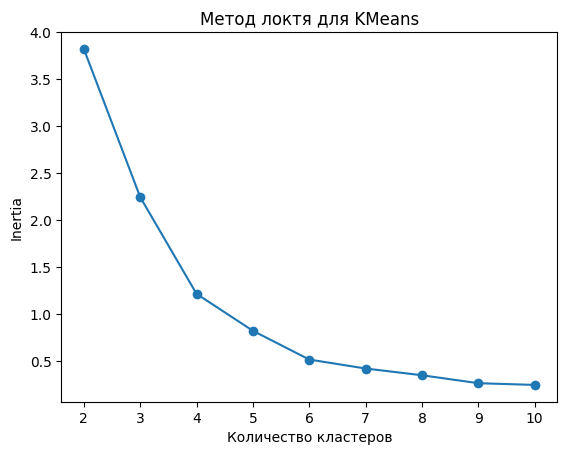

Наилучшие параметры DBSCAN - eps: 0.1, min_samples: 5, Silhouette Score: 0.5900481939315796, Количество кластеров: 2
Cluster
2    71
1    66
0    49
3    14
Name: count, dtype: int64


In [ ]:
###3 этап
import os
import glob
import nltk
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer, util
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

def uploud_embeddings():
  """загрузка сохраненного файла с эмбиддингами либо вызов функции создания"""
  filename = "embeddings.npy"
  if os.path.isfile(filename):
    # Загружаем эмбеддинги из файла
    embeddings = np.load("embeddings.npy")
    return embeddings
  else:
    embiddings = read_txt_files(folder_path, model_type ="transformers" )
    save_embirddings(embiddings)


def cluster_embeddings(embeddings, method="kmeans", n_clusters=None):
    """
    Кластеризация эмбеддингов.

    Args:
        embeddings (list): Список эмбеддингов.
        method (str): Метод кластеризации:
            - "kmeans": KMeans
            - "dbscan": DBSCAN
        n_clusters (int): Количество кластеров (для KMeans).

    Returns:
        list: Список номеров кластеров для каждого документа.
    """
    if method == "kmeans":
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(embeddings)
        return clusters
    elif method == "dbscan":
        dbscan = DBSCAN(eps=0.5, min_samples=5)  # Подберите параметры eps и min_samples
        clusters = dbscan.fit_predict(embeddings)
        return clusters
    else:
        raise ValueError(f"Неизвестный метод кластеризации: {method}")

def evaluate_clustering(embeddings, method="kmeans", range_n_clusters=range(2, 11)):
    """
    Оценка качества кластеризации с помощью метода локтя или Silhouette Score.

    Args:
        embeddings (list): Список эмбеддингов.
        method (str): Метод кластеризации:
            - "kmeans": KMeans
            - "dbscan": DBSCAN
        range_n_clusters (range): Диапазон количества кластеров для метода локтя.

    Returns:
        None
    """
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    best_clusters = None

    if method == "kmeans":
        inertia = []
        for n_clusters in range_n_clusters:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(embeddings)
            inertia.append(kmeans.inertia_)

        # Метод локтя
        plt.plot(range_n_clusters, inertia, marker='o')
        plt.xlabel('Количество кластеров')
        plt.ylabel('Inertia')
        plt.title('Метод локтя для KMeans')
        plt.show()

    elif method == "dbscan":
      best_silhouette = -1
      best_eps = None
      best_min_samples = None
      best_clusters = None
      # Silhouette Score
      for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
          for min_samples in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
              dbscan = DBSCAN(eps=eps, min_samples=min_samples)
              clusters = dbscan.fit_predict(embeddings)
              # Проверка, что найдено больше одного кластера
              if len(set(clusters)) > 1:
                  silhouette_avg = silhouette_score(embeddings, clusters)
                  # Если текущий лучше, обновляем наилучшие значения
                  if silhouette_avg > best_silhouette:
                      best_silhouette = silhouette_avg
                      best_eps = eps
                      best_min_samples = min_samples
                      best_clusters = clusters
              num_clusters = len(set(best_clusters)) if best_clusters is not None else 0
      print(f"Наилучшие параметры DBSCAN - eps: {best_eps}, min_samples: {best_min_samples}, " f"Silhouette Score: {best_silhouette}, Количество кластеров: {num_clusters}")

#загрузка эмбидингов
embeddings = uploud_embeddings()

# Оценка качества кластеризации
method = "kmeans"
range_n_clusters = range(2, 11)
evaluate_clustering(embeddings, method, range_n_clusters)  # Оценка качества KMeans с помощью метода локтя

method = "dbscan"
evaluate_clustering(embeddings, method)  # Оценка качества DBSCAN с помощью Silhouette Score

# Исходя из графика видиться оптимальным 3-4 кластера
n_clusters = 4  # Выберите оптимальное количество кластеров (определенное с помощью метода локтя или Silhouette Score)
clusters = cluster_embeddings(embeddings, method="kmeans", n_clusters=n_clusters)

# Сохранение данных в DataFrame
df = pd.DataFrame({'Cluster': clusters})
print(df['Cluster'].value_counts())

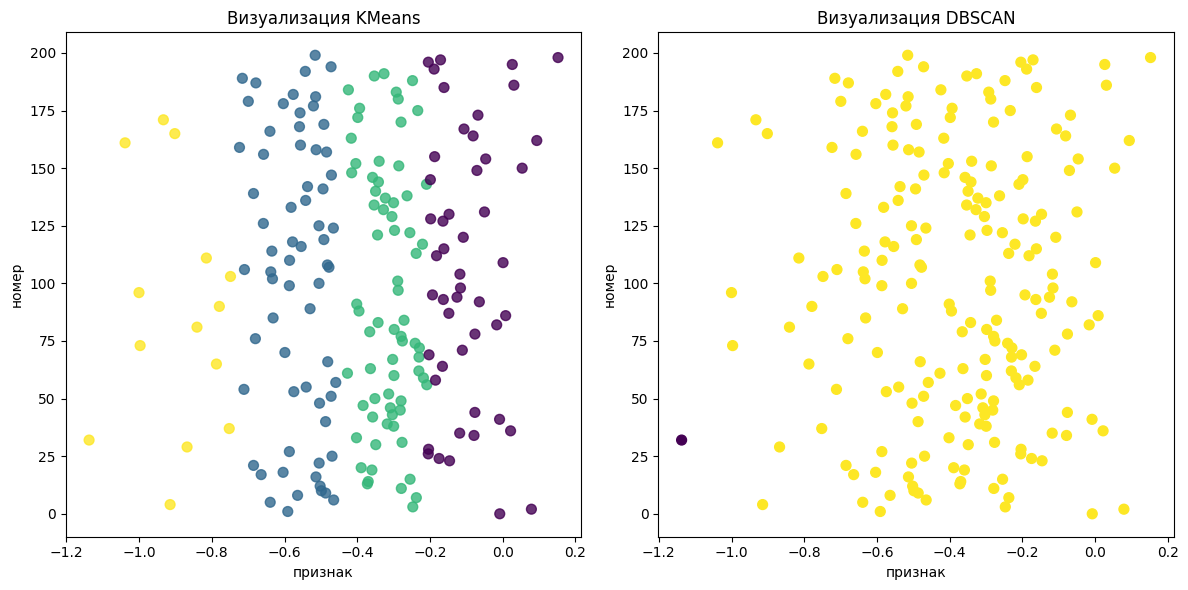

In [ ]:
##3 этап продолжение

def visualize_clustering(embeddings,n_clusters, random_state, eps, min_samples):
  """
    Визуализация результатов кластеризации KMeans и DBSCAN рядом.

    Args:
        embeddings (list): Список эмбеддингов.
        n_clusters (int): Количество кластеров для KMeans.
        random_state (int): Случайное состояние для KMeans.
        eps (float): Параметр eps для DBSCAN.
        min_samples (int): Параметр min_samples для DBSCAN.
    """
  # KMeans
  best_kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
  best_kmeans.fit(embeddings)
  best_clusters = best_kmeans.labels_
  cluster_centers = best_kmeans.cluster_centers_

  # DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  clusters = dbscan.fit_predict(embeddings)

  plt.figure(figsize=(12, 6)) # Увеличиваем размер фигуры

  # Первый график: KMeans
  plt.subplot(1, 2, 1)  # Создаем подграфик 1 из 2, слева
  plt.scatter(embeddings[:, 0], np.arange(len(embeddings)), c=best_clusters, cmap='viridis', marker='o', s=50, alpha=0.8)
  plt.title('Визуализация KMeans')
  plt.xlabel('признак')
  plt.ylabel('номер документа')

  # Второй график: DBSCAN
  plt.subplot(1, 2, 2)  # Создаем подграфик 2 из 2, справа
  plt.scatter(embeddings[:, 0], np.arange(len(embeddings)), c=clusters, cmap='viridis', marker='o', s=50)
  plt.title('Визуализация DBSCAN')
  plt.xlabel('признак')
  plt.ylabel('номер документа')

  plt.tight_layout()  # отступы
  plt.show()

visualize_clustering(embeddings = embeddings,n_clusters=4,random_state =42, eps=0.1, min_samples=5)
#####
#Видим,что K means удалось разбить на больше количество кластеров.

In [ ]:
#4этап
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np


def classify_new_document(new_document, embeddings, clusters, method="nearest_neighbors"):
    """
    Классификация нового документа.

    Args:
        new_document (str): Новый текст документа.
        embeddings (list): Список эмбеддингов.
        clusters (list): Список номеров кластеров для каждого документа.
        method (str): Метод классификации:
            - "nearest_neighbors": Метод ближайших соседей.
            - "cosine_similarity": Косинусное расстояние.

    Returns:
        int: Номер кластера, к которому принадлежит новый документ.
    """
    if type(new_document) is not str:
      raise ValueError(f"Тип нового документа не строка")

    new_embedding = get_embeddings([new_document], model_type="transformers")[0]  # Получение эмбеддинга нового документа

    if method == "nearest_neighbors":
        # Метод ближайших соседей
        neigh = NearestNeighbors(n_neighbors=1)
        neigh.fit(embeddings)
        distances, indices = neigh.kneighbors([new_embedding])
        cluster_index = clusters[indices[0][0]]  # Индекс кластера ближайшего соседа
        return f"Метод {method} отнес документ к кластеру: {cluster_index}"

    elif method == "cosine_similarity":
        # Косинусное расстояние
        similarities = cosine_similarity([new_embedding], embeddings)
        cluster_index = clusters[np.argmax(similarities)]  # Индекс кластера с максимальной схожестью
        return f"Метод {method} отнес документ к кластеру: {cluster_index}"
    else:
        raise ValueError(f"Неизвестный метод классификации: {method}")

# Новый тестовый документ
new_document = "This is a new document about data science."
#если загружать
#new_document = uload_file()
def uload_file():
  from google.colab import files
  uploaded = files.upload()
  # Вывод имени загруженного файла
  for fn in uploaded.keys():
    print(f'Загруженный файл: "{fn}"')
  # Чтение содержимого файла
  with open(fn, 'r') as f:
    content = f.read()
    return str(content)
#clusters = cluster_embeddings(embeddings, method="kmeans", n_clusters=n_clusters)

# Классификация нового документа с выбранными методами
k_means_nn = classify_new_document(new_document, embeddings, clusters, method="nearest_neighbors")
print(f"При использовании метода кластеризации K-means {k_means_nn}")
k_means_cs = classify_new_document(new_document, embeddings, clusters, method="cosine_similarity")
print(f"При использовании метода кластеризации K-means {k_means_cs}")
#Как видим разные методы отнесли документ к разным кластерам.Попробуем сменить кластеризацию
clusters = cluster_embeddings(embeddings, method="dbscan", n_clusters=n_clusters)
dbscan_nn=classify_new_document(new_document, embeddings, clusters, method="nearest_neighbors")
print(f"При использовании метода кластеризации dbscan {dbscan_nn}")
dbscan_cs=classify_new_document(new_document, embeddings, clusters, method="cosine_similarity")
print(f"При использовании метода кластеризации dbscan {dbscan_cs}")
######
#Видим,что при использовании метода кластеризации DBSCAN 2 метода отнесли новый документ к 0 кластеру,тогда как при использовании k-means методы разошлись.
#Теоритечески это можно обьяснить,что у k means разделение на 4 кластера а у DBSCAN 2 кластера

При использовании метода кластеризации K-means Метод nearest_neighbors отнес документ к кластеру: 2
При использовании метода кластеризации K-means Метод cosine_similarity отнес документ к кластеру: 0
При использовании метода кластеризации dbscan Метод nearest_neighbors отнес документ к кластеру: 0
При использовании метода кластеризации dbscan Метод cosine_similarity отнес документ к кластеру: 0


Задание 3*. Проект для стажировки
Предложите и подробно опишите проект для текущей стажировки.

* анализ вакансий по необходимым навыкам по IT направлениям
* анализ комментариев Ютуб(проект как помощь блогерам для работы с аудиторией)
* анализ сезонности покупок товаров и покупки сопутствующих (проект как помощь продавцам например Ozon\Wildebires)
*анализ риска блокировки ресурсов(прогнозная модель с каким нибудь rank)
*перевод сканов/фото в документы(например скрин накладной в документ Excel)

                Vacancy  Count
0   junior data analyst     42
1   junior data science     54
2  junior data engineer     54
3   middle data analyst     53
4   middle data science     72
5  middle data engineer     82
6   senior data analyst     56
7   senior data science     68
8  senior data engineer      1


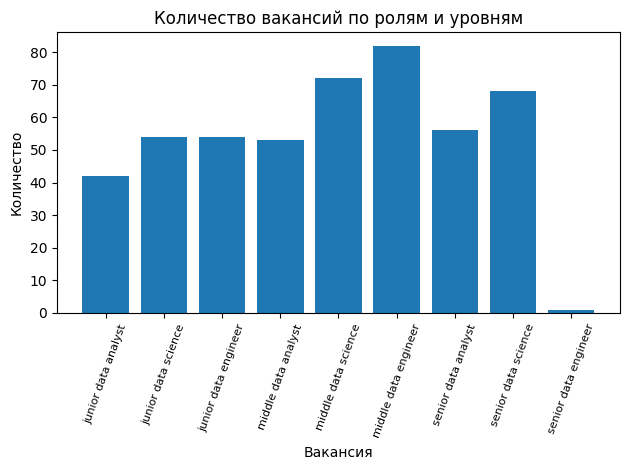

In [ ]:
#1 версия парсера вакансий
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

def get_vacancy_list(roles, levels):
    """Генерирует список ссылок по указанным ролям и уровням. """
    vacancy_list = []
    for level in levels:
        for role in roles:
            vacancy_list.append(f"{level}+{role.replace(' ', '+')}".lower())
    return vacancy_list


def generate_vacancy_link(vacancy_list):
    """Генерирует список ссылок на вакансий по ролям и уровням. """
    url = "https://indeed-rabota.ru/russia/"
    vacancy_link = []
    for vacancy in vacancy_list:
        link = url + str(vacancy)
        vacancy_link.append(link)
    return vacancy_link

def get_vacancy_count(url):
    """Получает число вакансий с заданного URL."""
    response = requests.get(url)
    #ошибка hhtp
    response.raise_for_status()

    soup = BeautifulSoup(response.content, 'html.parser')

    # элемент с количеством вакансий
    vacancy_count_element = soup.find('div').find('h1',class_='content__title').find('span',class_='content__additional').text
    #последовательность чисел строке
    digits = re.findall(r'\d+', vacancy_count_element)
    result = int(digits[0]) if digits else None
    return result

def get_vacancy_data(roles, levels):
  """Получает данные о количестве вакансий для каждой роли и уровня."""
  vacancy_list = get_vacancy_list(roles, levels)
  vacancy_links = generate_vacancy_link(vacancy_list)
  vacancy_data = []
  for link in vacancy_links:
    vacancy_count = get_vacancy_count(link)
    if vacancy_count:
      vacancy_data.append([link.split('/')[-1].replace('+', ' '), vacancy_count])
  return vacancy_data


# запуск скрипта и параметры:
roles = ['Data Analyst', 'Data Science', 'Data Engineer']
levels = ['Junior', 'Middle', 'Senior']
vacancy_data = get_vacancy_data(roles, levels)
###Представление в табличном и графическом виде
# Создаем DataFrame
df = pd.DataFrame(vacancy_data, columns=['Vacancy', 'Count'])
print(df)
# Строим гистограмму
plt.bar(df['Vacancy'], df['Count'])
plt.xlabel('Вакансия', labelpad=5)  # Добавляем отступ у xlabel
plt.ylabel('Количество')
plt.title('Количество вакансий по ролям и уровням')
plt.xticks(rotation=70, fontsize=8)
plt.tight_layout()  # Улучшаем компоновку
plt.show()